# Simple CNN Tutorial 

# Importing the Needed Libraries

In [78]:
'''Importing the Basic Libraries'''
import pandas as pd
import numpy as np 

'''Importing the Sklearn Stuff '''
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

'''Importing the Keras Stuff'''
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical

'''Importing the Matplotlib Stuff'''
import matplotlib.pyplot as plt 
%matplotlib inline 

# Importing the Data

In [79]:
data = fetch_lfw_people(min_faces_per_person=70)

# Data PreProcessing

In [63]:
X = data.data
y = to_categorical(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y)

'''Transforming the X_train'''
X_train = X_train.reshape(X_train.shape[0], 62,47,1)
X_test = X_test.reshape(X_test.shape[0], 62,47,1)

X_train = X_train/255.
X_test = X_test/255.

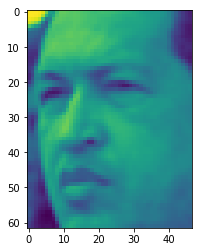

In [59]:
plt.imshow(data.images[0])

# Buidling a Simple Model

In [75]:
model = Sequential()

'''Setting up the Convolutional Layer'''
model.add(Conv2D(15, (5,5), input_shape = (62,47,1), activation='relu')) # Default Stride
'''Getting rid of the reduncancy from the earlier pooling'''
model.add(MaxPool2D((2,2)))

model.add(Conv2D(30, (4,4),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten()) # To Fully Connect 

model.add(Dense(50, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the Model

In [77]:
model.fit(X_train, y_train, epochs=50, verbose=1)

Epoch 1/50
966/966 [==============================] - 2s 2ms/step - loss: 0.7943 - acc: 0.7319
Epoch 2/50
966/966 [==============================] - 2s 2ms/step - loss: 0.6271 - acc: 0.7992
Epoch 3/50
966/966 [==============================] - 2s 2ms/step - loss: 0.5075 - acc: 0.8333
Epoch 4/50
966/966 [==============================] - 2s 2ms/step - loss: 0.4217 - acc: 0.8644
Epoch 5/50
966/966 [==============================] - 2s 2ms/step - loss: 0.3522 - acc: 0.8882
Epoch 6/50
966/966 [==============================] - 2s 2ms/step - loss: 0.2880 - acc: 0.9203
Epoch 7/50
966/966 [==============================] - 2s 2ms/step - loss: 0.2403 - acc: 0.9275A: 1s - l
Epoch 8/50
966/966 [==============================] - 2s 2ms/step - loss: 0.1795 - acc: 0.9451
Epoch 9/50
966/966 [==============================] - 2s 2ms/step - loss: 0.1296 - acc: 0.9720
Epoch 10/50
966/966 [==============================] - 2s 2ms/step - loss: 0.1170 - acc: 0.9720
Epoch 11/50
966/966 [===================

# Another CNN  - with Digits Analyzer from Kaggle 

In [81]:
df = pd.read_csv('train.csv')

In [82]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
y = to_categorical(df['label'].values)

In [88]:
y

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [102]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[1:]].values, y)

In [103]:
X_train.shape

(31500, 784)

In [104]:
X_test.shape

(10500, 784)

In [105]:
y_train.shape

(31500, 10)

In [106]:
y_test.shape

(10500, 10)

In [107]:
X_train = X_train/255.

X_test = X_test/255.

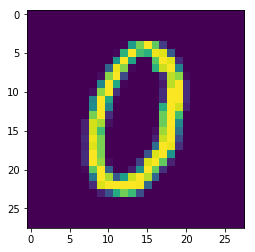

In [108]:
plt.imshow(df.iloc[5,1:].values.reshape(28,28))

In [109]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [118]:
model = Sequential()

model.add(Conv2D(15, kernel_size=(5,5), input_shape = (28,28,1), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(30, kernel_size=(4,4), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(45, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(50, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [119]:
model.fit(X_train,y_train, validation_data=[X_test, y_test], epochs=5)

Train on 31500 samples, validate on 10500 samples
Epoch 1/5
31500/31500 [==============================] - 16s 506us/step - loss: 0.3311 - acc: 0.8965 - val_loss: 0.1091 - val_acc: 0.9690
Epoch 2/5
31500/31500 [==============================] - 15s 483us/step - loss: 0.0967 - acc: 0.9705 - val_loss: 0.0837 - val_acc: 0.9752
Epoch 3/5
31500/31500 [==============================] - 15s 482us/step - loss: 0.0662 - acc: 0.9798 - val_loss: 0.0613 - val_acc: 0.9818
Epoch 4/5
31500/31500 [==============================] - 15s 484us/step - loss: 0.0525 - acc: 0.9834 - val_loss: 0.0723 - val_acc: 0.9771
Epoch 5/5
31500/31500 [==============================] - 16s 513us/step - loss: 0.0429 - acc: 0.9869 - val_loss: 0.0626 - val_acc: 0.9807


In [120]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 24, 24, 15)        390       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 12, 12, 15)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 9, 9, 30)          7230      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 4, 4, 30)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 2, 2, 45)          12195     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 1, 1, 45)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 45)                0         
__________

In [121]:
# GridSearch 